In [1]:
import pandas as pd
import numpy as np


In [2]:
# taken from imigrant conjoint data
df = pd.read_csv('candidate.tab', delimiter='\t')
df

,resID,atmilitary,atreligion,ated,atprof,atinc,atrace,atage,atmale,selected,rating
0,383,1,6,3,6,6,1,6,2,0,0.333333
1,383,2,1,1,4,3,6,4,1,1,0.500000
2,383,1,3,5,5,1,2,5,2,1,0.666667
3,383,2,4,5,3,2,1,6,1,0,0.666667
4,383,2,1,2,3,6,2,2,2,0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
3461,72,2,3,3,1,1,3,4,1,0,0.500000
3462,72,1,2,6,3,2,5,4,1,0,0.500000
3463,72,2,4,4,3,3,1,2,1,1,0.500000
3464,72,2,6,3,1,5,4,2,1,1,0.500000


In [6]:
len(df['resID'].unique())

311

In [7]:
# df.loc[df['resID']==383,:]

In [8]:
df.head()

,resID,atmilitary,atreligion,ated,atprof,atinc,atrace,atage,atmale,selected,rating
0,383,1,6,3,6,6,1,6,2,0,0.333333
1,383,2,1,1,4,3,6,4,1,1,0.500000
2,383,1,3,5,5,1,2,5,2,1,0.666667
3,383,2,4,5,3,2,1,6,1,0,0.666667
4,383,2,1,2,3,6,2,2,2,0,0.333333


In [9]:
# checking for empty data
df.isnull().sum()

resID          0
atmilitary     0
atreligion     0
ated           0
atprof         0
atinc          0
atrace         0
atage          0
atmale         0
selected       0
rating        10
dtype: int64

In [10]:
# remove empty data
clean_df = df[~df.rating.isnull()]

In [11]:
# y

In [12]:

y = clean_df['selected']
x = clean_df[[x for x in df.columns if x != 'selected' and x != 'resID' and x != 'rating']]



In [13]:
xdum = pd.get_dummies(x, columns=[c for c in x.columns if c != 'selected'], drop_first=True, dtype=float)
xdum.head()

,atmilitary_2,atreligion_2,atreligion_3,atreligion_4,atreligion_5,atreligion_6,ated_2,ated_3,ated_4,ated_5,...,atrace_3,atrace_4,atrace_5,atrace_6,atage_2,atage_3,atage_4,atage_5,atage_6,atmale_2
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [16]:
xdum = sm.add_constant(xdum) 

In [17]:
xdum

,const,atmilitary_2,atreligion_2,atreligion_3,atreligion_4,atreligion_5,atreligion_6,ated_2,ated_3,ated_4,...,atrace_3,atrace_4,atrace_5,atrace_6,atage_2,atage_3,atage_4,atage_5,atage_6,atmale_2
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3462,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3463,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3464,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
res = sm.OLS(y, xdum, family=sm.families.Binomial()).fit()
res.summary()


/Users/xena/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               selected   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     10.72
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           7.39e-51
Time:                        19:32:09   Log-Likelihood:                -2343.3
No. Observations:                3456   AIC:                             4753.
Df Residuals:                    3423   BIC:                             4956.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3963      0.047      8.512      0.000       0.305       0.488
atmilitary_2     0.0863      0.016      5.277      0.000       0.054       0.118
atreligion_2    -0.0353      0.028     -1.252      0.211      -0.091       0.020
atreligion_3    -0.0128      0.028     -0.457      0.648      -0.068       0.042
atreligion_4    -0.0134      0.028     -0.474      0.636      -0.069       0.042
atreligion_5    -0.1149      0.028     -4.061      0.000      -0.170      -0.059
atreligion_6    -0.1342      0.028     -4.774      0.000      -0.189      -0.079
ated_2           0.1402      0.029      4.834      0.000       0.083       0.197
ated_3           0.1490      0.029      5.160      0.000       0.092       0.206
ated_4           0.1861      0.028      6.602      0.000       0.131       0.241
ated_5           0.1773      0.028      6.256      0.000       0.122       0.233
ated_6           0.2696      0.028      9.727      0.000       0.215       0.324
atprof_2        -0.0232      0.029     -0.815      0.415      -0.079       0.033
atprof_3        -0.0175      0.028     -0.623      0.533      -0.072       0.037
atprof_4        -0.0410      0.028     -1.459      0.145      -0.096       0.014
atprof_5        -0.0939      0.029     -3.281      0.001      -0.150      -0.038
atprof_6        -0.2271      0.028     -8.006      0.000      -0.283      -0.171
atinc_2          0.0236      0.029      0.818      0.413      -0.033       0.080
atinc_3          0.0635      0.028      2.299      0.022       0.009       0.118
atinc_4          0.0316      0.028      1.120      0.263      -0.024       0.087
atinc_5          0.0727      0.028      2.603      0.009       0.018       0.127
atinc_6          0.0080      0.028      0.284      0.776      -0.047       0.063
atrace_2         0.0253      0.028      0.892      0.373      -0.030       0.081
atrace_3         0.0359      0.028      1.285      0.199      -0.019       0.091
atrace_4        -0.0237      0.029     -0.824      0.410      -0.080       0.033
atrace_5         0.0050      0.028      0.176      0.860      -0.050       0.060
atrace_6         0.0408      0.029      1.429      0.153      -0.015       0.097
atage_2          0.0254      0.029      0.886      0.376      -0.031       0.081
atage_3          0.0220      0.028      0.787      0.431      -0.033       0.077
atage_4          0.0031      0.028      0.109      0.913      -0.052       0.059
atage_5         -0.0642      0.028     -2.305      0.021      -0.119      -0.010
atage_6         -0.1464      0.028     -5.211      0.000      -0.201      -0.091
atmale_2         0.0022      0.016      0.134      0.893      -0.030       0.034
==============================================================================
Omnibus:                    16383.026   Durbin-Watson:                   2.872
Prob(Omni

In [19]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)


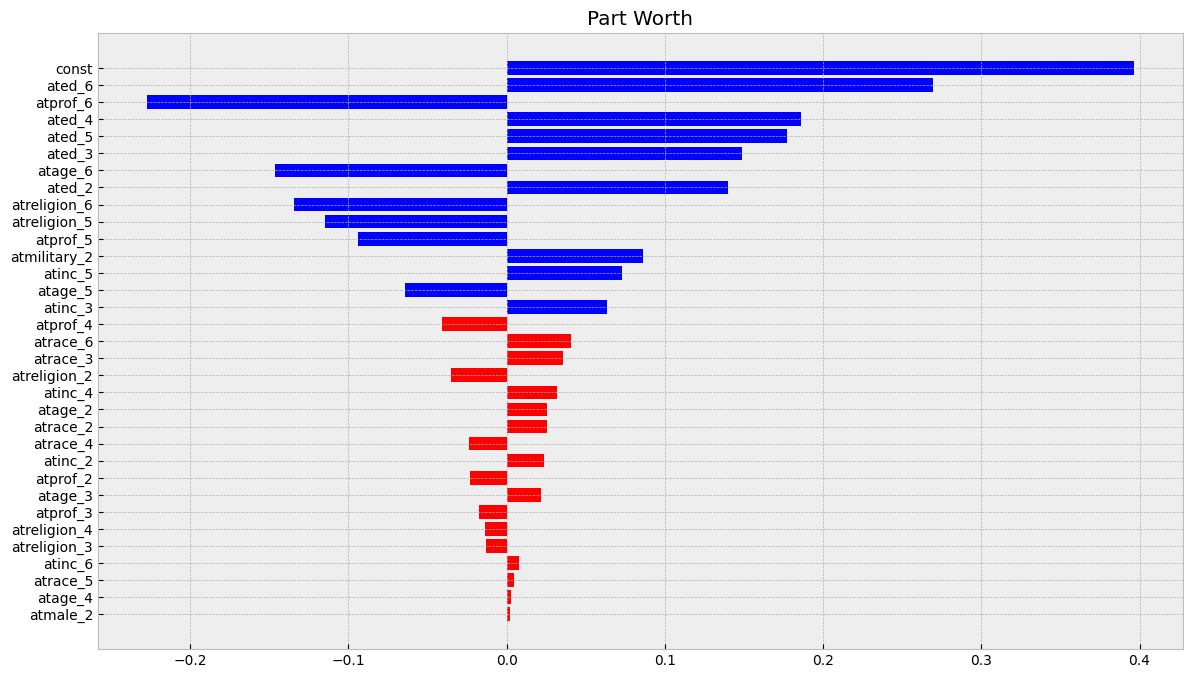

In [20]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()


In [23]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)


In [24]:
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

# compute relative importance per feature
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}


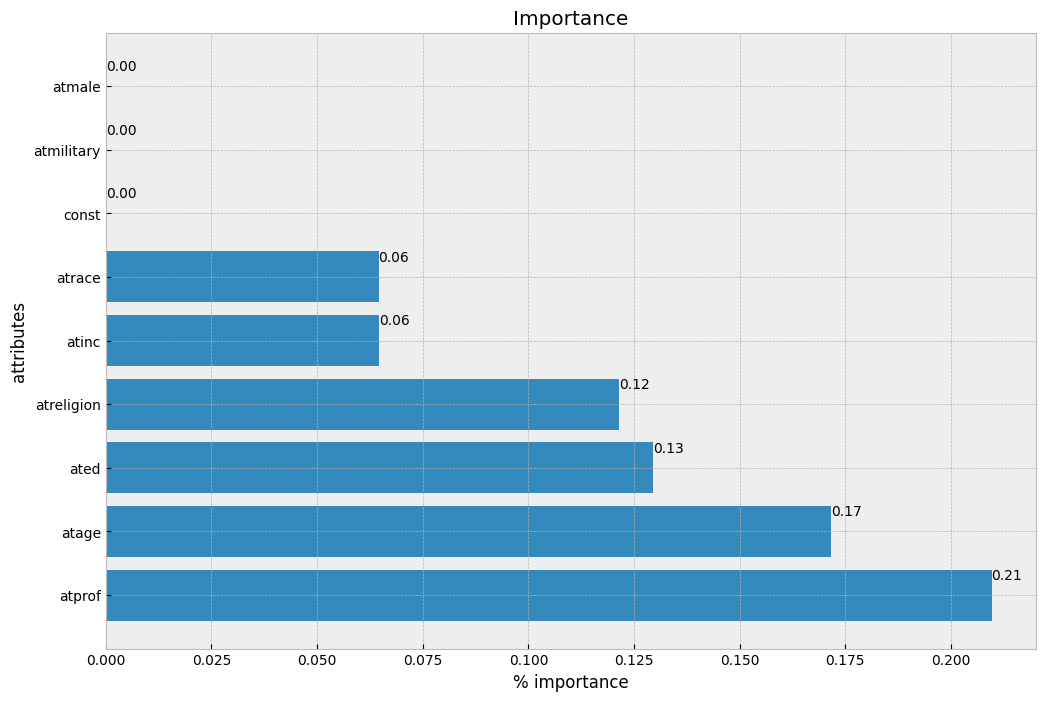

In [25]:
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()


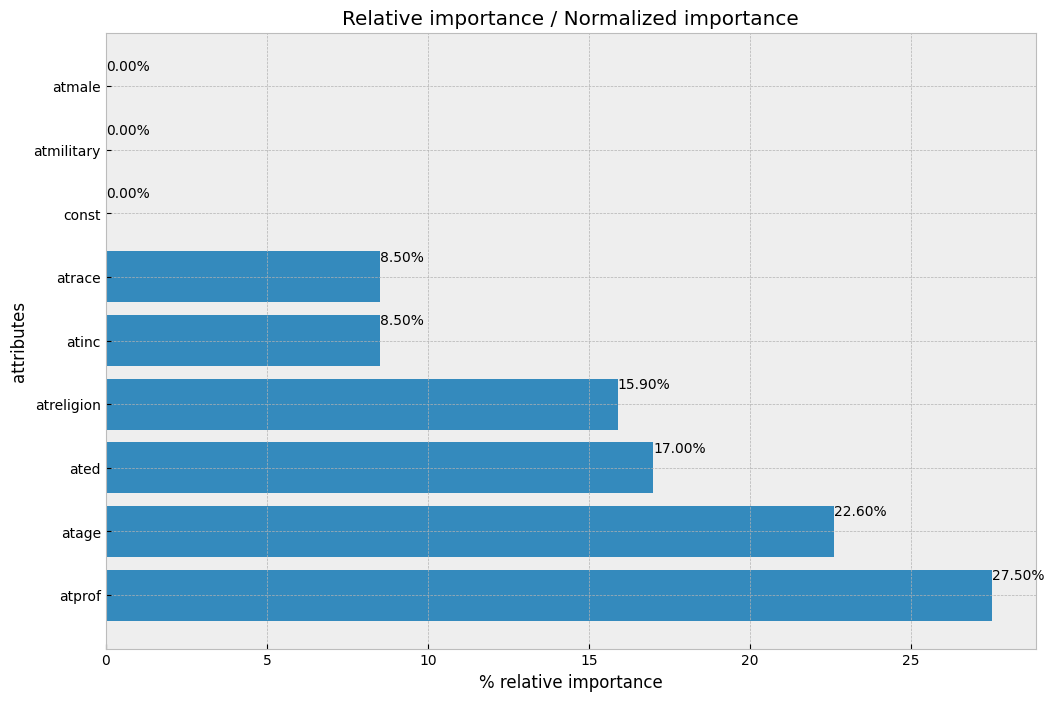

In [26]:
alt_data = pd.DataFrame(
    list(relative_importance_per_feature.items()), 
    columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance')
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

# png